In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import preprocessing

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.corr().style.background_gradient(cmap='BuGn')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [6]:
df.drop(['BloodPressure', 'SkinThickness'], axis=1, inplace=True)

In [7]:
df.isna().sum()

Pregnancies    0
Glucose        0
Insulin        0
BMI            0
Pedigree       0
Age            0
Outcome        0
dtype: int64

In [8]:
df.describe()

,Pregnancies,Glucose,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,846.000000,67.100000,2.420000,81.000000,1.000000


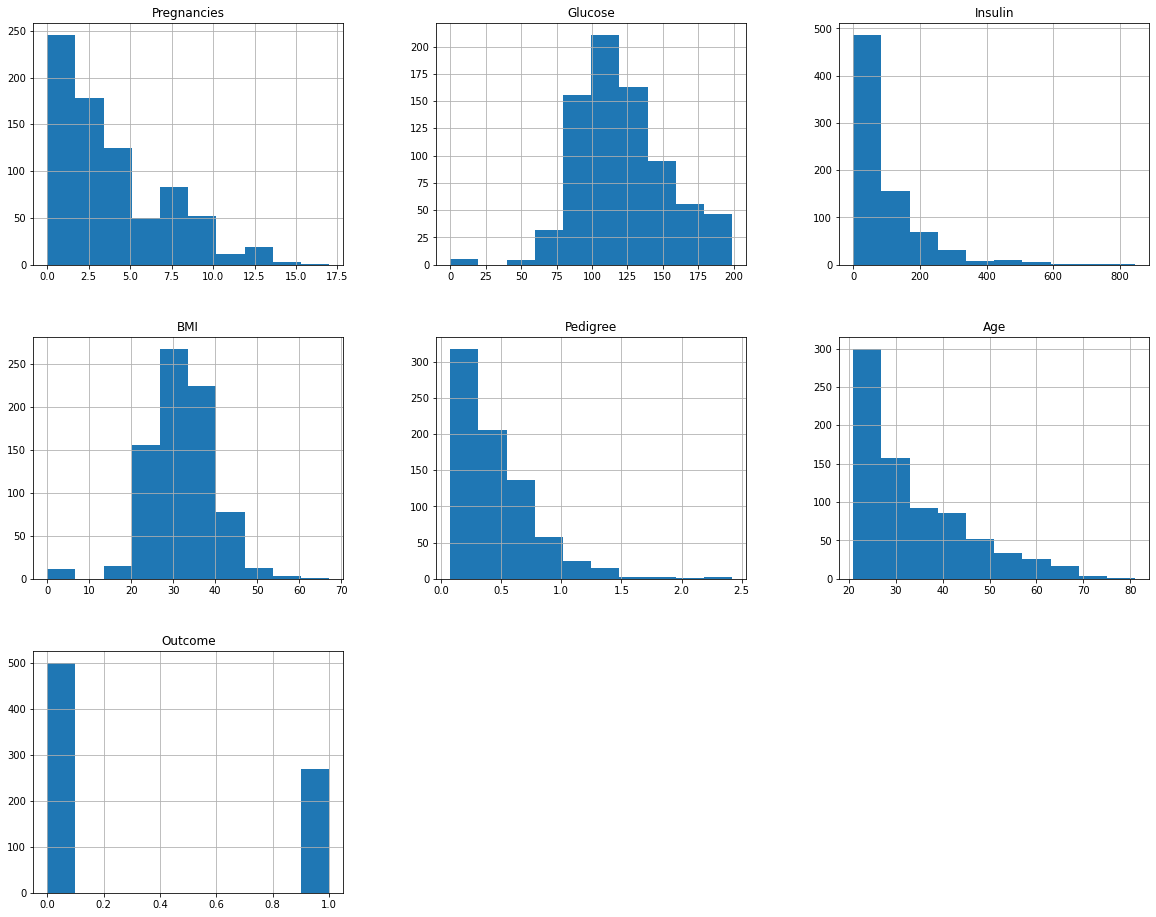

In [9]:
hist = df.hist(figsize=(20,16))

In [10]:
X=df.iloc[:, :df.shape[1]-1]       #Independent Variables
y=df.iloc[:, -1]                   #Dependent Variable
X.shape, y.shape

((768, 6), (768,))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
def knn(X_train, X_test, y_train, y_test, neighbors, power):
    model = KNeighborsClassifier(n_neighbors=neighbors, p=power)
    # Fit and predict on model
    # Model is trained using the train set and predictions are made based on the test set. Accuracy scores are calculated for the model.
    y_pred=model.fit(X_train, y_train).predict(X_test)
    print(f"Accuracy for K-Nearest Neighbors model \t: {accuracy_score(y_test, y_pred)}")

    cm = confusion_matrix(y_test, y_pred)
    print(f'''Confusion matrix :\n
    | Positive Prediction\t| Negative Prediction
    ---------------+------------------------+----------------------
    Positive Class | True Positive (TP) {cm[0, 0]}\t| False Negative (FN) {cm[0, 1]}
    ---------------+------------------------+----------------------
    Negative Class | False Positive (FP) {cm[1, 0]}\t| True Negative (TN) {cm[1, 1]}\n''')
    cr = classification_report(y_test, y_pred)
    print('Classification report : \n', cr)

In [13]:
param_grid = {
    'n_neighbors': range(1, 51),
    'p': range(1, 4)
}
grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
grid.best_estimator_, grid.best_params_, grid.best_score_

(KNeighborsClassifier(n_neighbors=27),
 {'n_neighbors': 27, 'p': 2},
 0.7719845395175262)

In [14]:
knn(X_train, X_test, y_train, y_test, grid.best_params_['n_neighbors'], grid.best_params_['p'])

Accuracy for K-Nearest Neighbors model 	: 0.7987012987012987
Confusion matrix :

    | Positive Prediction	| Negative Prediction
    ---------------+------------------------+----------------------
    Positive Class | True Positive (TP) 91	| False Negative (FN) 11
    ---------------+------------------------+----------------------
    Negative Class | False Positive (FP) 20	| True Negative (TN) 32

Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       102
           1       0.74      0.62      0.67        52

    accuracy                           0.80       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.80      0.79       154

